In [1]:
using PyPlot;         # Tells the computer to “add” a package for (later) generating plots;
Δt = 0.001;           # Width of the integration step;
N  = round(Int,60./Δt);         # Number of integration steps;

V = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
I = zeros(N,1);      # Initialization of an array of N elements, filled with 0;
G = zeros(N,1);      

V[1] = -70;           # Initial condition for the numerical solution;
I[1] = 1;             # Initial condition for the external input;
G[1] = 0;         

alfa = 0.001;
F = 200;              # Chosen frequency;


threshold = true; #enable/disable threshold
theta = -66;      #threshold value

for k=2:N,                                                  
                       
    
    V[k] = V[k-1] + Δt*(G[k-1] + I[k-1]);       # Euler forward method;
    G[k]= 0.15*(-70 - V[k]);                    # Linear function;
    I[k] = 1.5 #sin(2*π*alfa*F*(k)*Δt) + 1;          # Electric input current;
    
    if threshold                                #if is threshold is enabled
        if V[k] >= theta                        #integrate and fire condition
            V[k]=V[1]                           #reset
        end
    end

end                

max = (N-1) * Δt;          # Value corresponding to the maximal integration step;
t   = 0:Δt:max;            # Initiation of an array of N elements, with increasing values (i.e. horizontal coordinate)

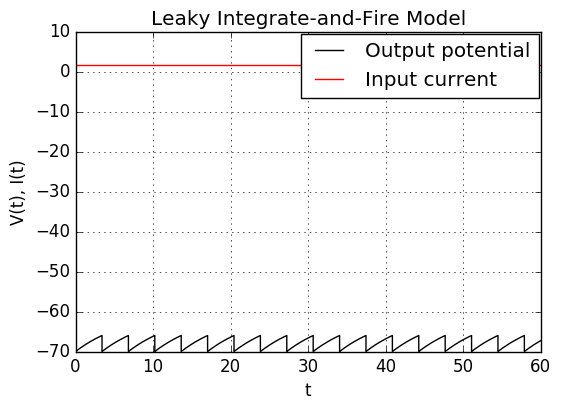

In [2]:
fig = figure("Numerical method",figsize=(6,4));    # Create a new figure, with desired size;

plot(t, V, "k-", label="Output potential");              # Plot in the current figure, V(x) - the mumerical solution (output);
plot(t, I, "r-", label="Input current");             # Plot in the current figure, u(x) - external input;

xlabel("t");    # Label of the horizontal axis;
ylabel("V(t), I(t)");                              # Label of the vertical axis;
title("Leaky Integrate-and-Fire Model");            # Label of the title, at the top of the figure;
grid("on");                                        # "Grid" on;

legend(borderaxespad=0.1);                     # Add a legend to the current axes; 